In [1]:
%pip install seaborn numpy matplotlib pandas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

# Put your own path here
db_path = '/your/azure/synapse/path/database.sqlite'

# Take different aspects of the database
with sqlite3.connect(db_path) as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    Player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)
    Player = pd.read_sql_query("SELECT * from Player", con)
    
# Setting default Seaborn theme and setting maximum number of rows displayed
sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Shape the dataframe
Player_detail.shape
# Display the first five rows of the Player_detail DataFrame
Player_detail.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Text(0, 0.5, 'Count')

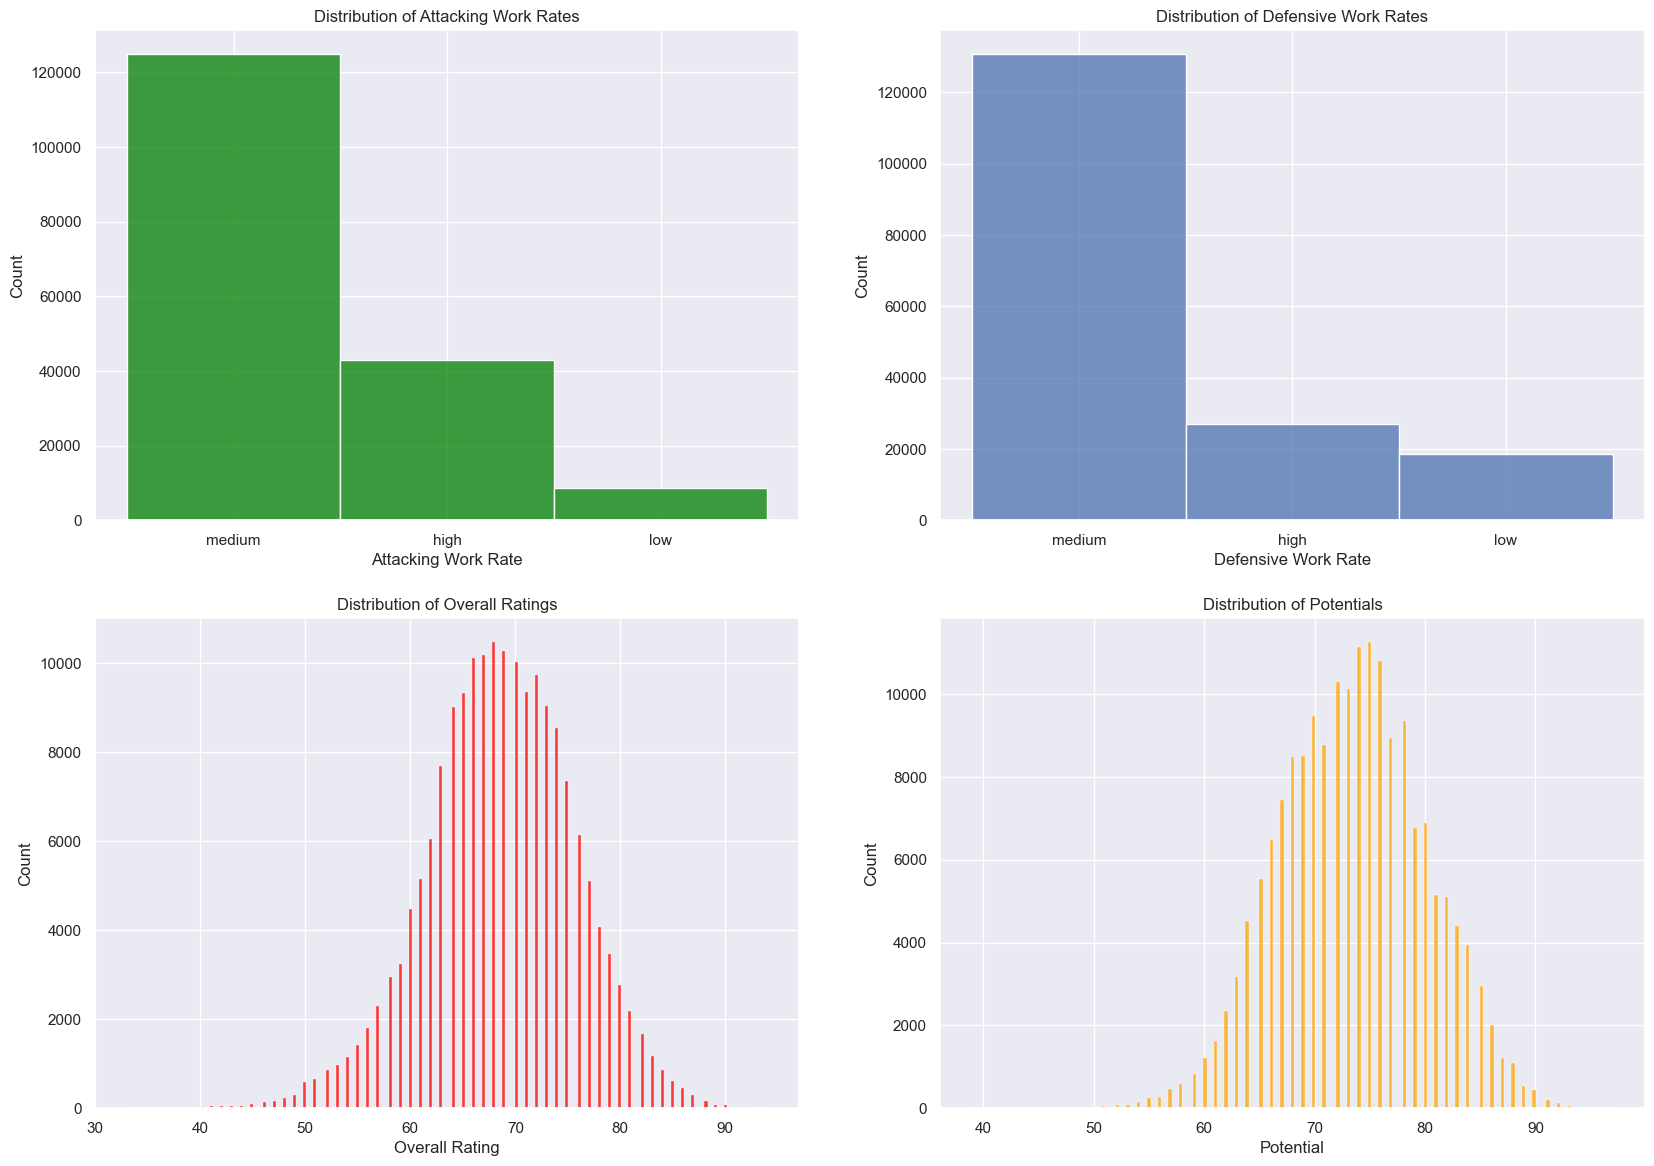

In [3]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,14))

# Extract subsets of the Player_detail DataFrame based on certain conditions
attack_work_rate = Player_detail[Player_detail['attacking_work_rate'].isin(['medium','high','low'])]
defence_work_rate = Player_detail[Player_detail['defensive_work_rate'].isin(['medium','high','low'])]


# Plot a histogram of attacking work rates on the top-left subplot
sns.histplot(attack_work_rate['attacking_work_rate'], ax=axes[0, 0], color='green')
axes[0, 0].set_title('Distribution of Attacking Work Rates')
axes[0, 0].set_xlabel('Attacking Work Rate')
axes[0, 0].set_ylabel('Count')

# Plot a histogram of defensive work rates on the top-right subplot
sns.histplot(defence_work_rate['defensive_work_rate'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Defensive Work Rates')
axes[0, 1].set_xlabel('Defensive Work Rate')
axes[0, 1].set_ylabel('Count')

# Plot a histogram of overall ratings on the bottom-left subplot
sns.histplot(Player_detail['overall_rating'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of Overall Ratings')
axes[1, 0].set_xlabel('Overall Rating')
axes[1, 0].set_ylabel('Count')

# Plot a histogram of potentials on the bottom-right subplot
sns.histplot(Player_detail['potential'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Potentials')
axes[1, 1].set_xlabel('Potential')
axes[1, 1].set_ylabel('Count')


In [4]:
# Display the first five rows of the Player DataFrame
Player.head(5)
# Combine the Player_detail and Player
Players = pd.merge(Player_detail,Player,on='player_api_id',how='left')
# Print the dataframes shapes
print(Player.shape)
print(Player_detail.shape)
print(Players.shape)

(11060, 7)
(183978, 42)
(183978, 48)


In [5]:
# Extract player data for analysis, focusing on the most recent Ballon d'Or winners and two of my favourite players(Suarez and Bale)
ballondr = Players[Players['player_name'].isin(['Lionel Messi','Cristiano Ronaldo','Luis Suarez','Gareth Bale'])]
ballondr.head(4)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
33330,33331,20801,30893,2015-10-16 00:00:00,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,90.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33331,33332,20801,30893,2015-09-25 00:00:00,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,87.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33332,33333,20801,30893,2015-09-21 00:00:00,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,87.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33333,33334,20801,30893,2015-05-15 00:00:00,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176


In [6]:
# Extract the mean overall ratings of the specified players
overall = ballondr[['overall_rating','player_name']].groupby('player_name').mean()
overall
# Lionel Messi and Cristiano are considered as a two of the best players from this era, Bale and Suares are also praised highly

,overall_rating
player_name,
Cristiano Ronaldo,91.280000
Gareth Bale,84.096774
Lionel Messi,92.192308
Luis Suarez,85.275000


In [7]:
# Checking the overall mean of the all players 
Players['overall_rating'].describe()
# In this case the average overall rating is 68.6

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [8]:
from datetime import date
# 
# Assuming 'date' and 'birthday' columns are present in the Players DataFrame
wales = Players[Players['player_name'].isin(['Gareth Bale', 'Aaron Ramsey', 'Ben Davies', 'Joe Allen', 'Chris Gunter', 'Wayne Hennessey'])].copy()

# Convert 'date' and 'birthday' columns to datetime
wales[['date', 'birthday']] = wales[['date', 'birthday']].apply(pd.to_datetime)

# Calculate age and filter players older than 18
wales['age'] = (wales['date'] - wales['birthday']).dt.days // 365
wales = wales[wales['age'] > 18]

# Display the five first rows of the dataframe
wales.head(5)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight,age
269,270,186561,75489,2016-03-10,82.0,85.0,right,high,high,75.0,75.0,58.0,83.0,79.0,81.0,70.0,70.0,80.0,82.0,69.0,69.0,77.0,82.0,75.0,81.0,65.0,92.0,69.0,75.0,74.0,69.0,83.0,81.0,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,15,Aaron Ramsey,186561,1990-12-26,177.8,154,25
270,271,186561,75489,2016-03-03,82.0,85.0,right,high,high,75.0,75.0,58.0,83.0,79.0,81.0,70.0,70.0,80.0,82.0,71.0,69.0,77.0,82.0,75.0,81.0,65.0,92.0,69.0,75.0,74.0,69.0,83.0,81.0,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,15,Aaron Ramsey,186561,1990-12-26,177.8,154,25
271,272,186561,75489,2016-02-18,82.0,85.0,right,high,high,75.0,75.0,58.0,83.0,79.0,81.0,70.0,70.0,81.0,82.0,71.0,69.0,77.0,82.0,75.0,81.0,65.0,92.0,69.0,77.0,74.0,69.0,83.0,81.0,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,15,Aaron Ramsey,186561,1990-12-26,177.8,154,25
272,273,186561,75489,2016-01-28,82.0,85.0,right,high,high,75.0,75.0,58.0,83.0,79.0,81.0,70.0,70.0,81.0,82.0,71.0,69.0,77.0,82.0,75.0,81.0,65.0,92.0,69.0,77.0,74.0,69.0,83.0,81.0,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,15,Aaron Ramsey,186561,1990-12-26,177.8,154,25
273,274,186561,75489,2015-09-21,82.0,86.0,right,high,high,74.0,75.0,58.0,84.0,81.0,81.0,64.0,70.0,82.0,82.0,71.0,68.0,74.0,81.0,75.0,81.0,63.0,93.0,69.0,78.0,75.0,67.0,84.0,81.0,76.0,65.0,75.0,65.0,6.0,11.0,5.0,10.0,8.0,15,Aaron Ramsey,186561,1990-12-26,177.8,154,24


In [9]:
# Show average ratings, age and name of selected Welsh players
wales_rating = wales[['player_name','age','overall_rating']].groupby(['age','player_name']).mean().unstack()
wales_rating.columns = ['Gareth Bale', 'Aaron Ramsey', 'Ben Davies', 'Joe Allen', 'Chris Gunter', 'Wayne Hennessey']
wales_rating.head(7)

,Gareth Bale,Aaron Ramsey,Ben Davies,Joe Allen,Chris Gunter,Wayne Hennessey
age,,,,,,
19,76.500000,64.00,69.500000,75.000000,65.00,NaN
20,76.000000,69.90,69.000000,73.000000,66.00,48.0
21,78.000000,72.75,72.000000,82.500000,70.50,75.0
22,78.166667,76.00,72.500000,85.500000,77.50,75.0
23,81.833333,NaN,70.000000,85.666667,77.00,73.5
24,82.000000,NaN,69.833333,87.000000,76.75,75.0
25,82.000000,NaN,68.500000,87.000000,76.50,75.5


Text(0, 0.5, 'Rating')

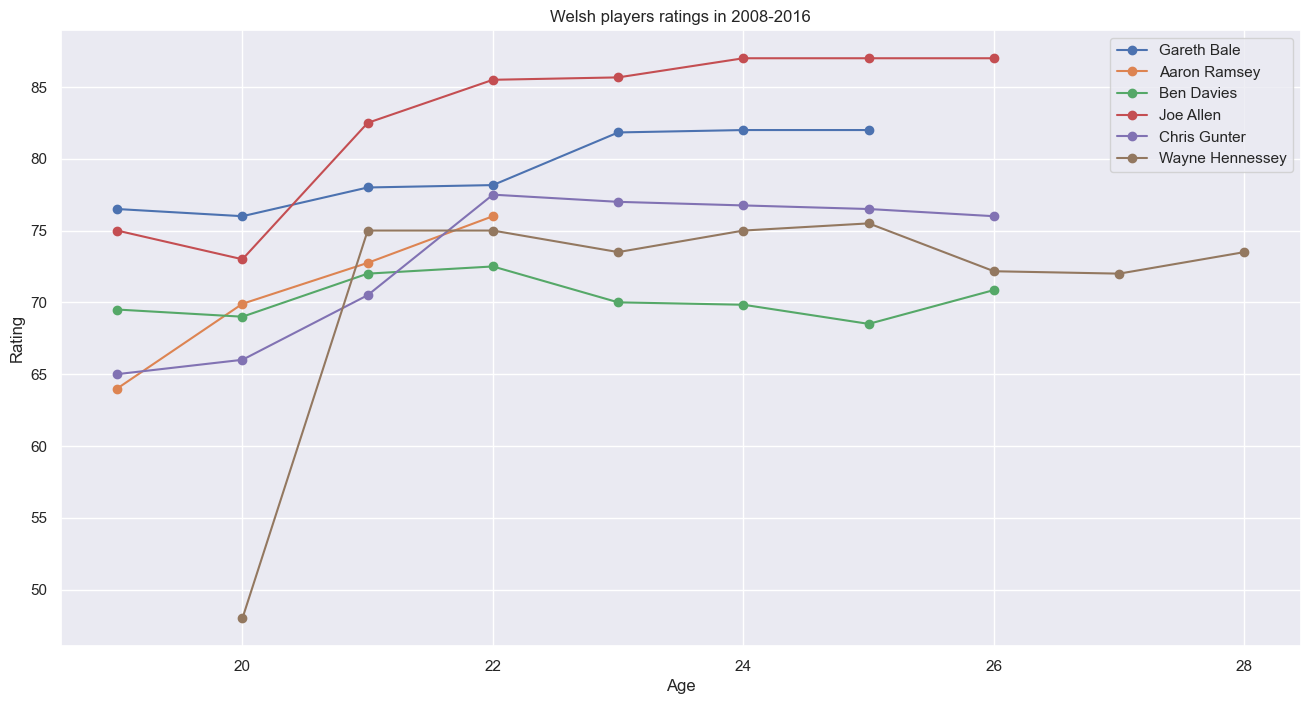

In [10]:
# Plot the ratings of Welsh players over the age range 2008-2016
ax = wales_rating.plot(figsize=(16, 8), marker='o')
plt.title("Welsh players ratings in 2008-2016")
plt.xlabel("Age")
plt.ylabel("Rating") 


In [16]:
# Select specific Welsh national team from the Players DataFrame
wales = Players[Players['player_name'].isin(['Gareth Bale', 'Aaron Ramsey', 'Ben Davies', 'Joe Allen', 'Chris Gunter', 'Wayne Hennessey', 'James Collins', 'Joe Allen', 'Andy King', 'Sam Wokes', 'Hal Robson-Kanu'])]

# Extract the maximum overall rating for each Welsh player and add the max column
wales_max_rating = wales[['player_name','overall_rating']].groupby('player_name').max()
wales_max_rating['max'] = 1

# Drop duplicate rows based on player name and merge the original DataFrame with maximum rating DataFrame
wales = pd.merge(wales,wales_max_rating,on=['player_name','overall_rating'],how='inner')
wales = wales.drop_duplicates(subset=['player_name']).reset_index(drop=True)
# Assign the country 'wales' to each Welsh player
wales['country'] = 'wales'

In [17]:
# Select specific Spanish national team from the Players DataFrame
germany = Players[Players['player_name'].isin(['Julian Draxler', 'Sami Khedira', 'Miroslav Klose', 'Lukas Podolski', 'Mesut Oezil', 'Toni Kroos', 'Bastian Schweinsteiger', 'Philipp Lahm', 'Shkodran Mustafi', 'Jerome Boateng', 'Mats Hummels'])]

# Extract the maximum overall rating for each Spanish player and add the 'max' column
germany_max_rating = germany[['player_name','overall_rating']].groupby('player_name').max()
germany_max_rating['max'] = 1

# Drop duplicate rows based on player name and merge the original DataFrame with maximum rating DataFrame
germany = pd.merge(germany,germany_max_rating,on=['player_name','overall_rating'],how='inner')
germany = germany.drop_duplicates(subset=['player_name']).reset_index(drop=True)
# Assign the country 'germany' to each German player
germany['country'] = 'germany'

In [18]:
# Select specific Spanish national team from the Players DataFrame
spain = Players[Players['player_name'].isin(['David Villa', 'Juan Mata', 'Jordi Alba', 'Cesc Fabregas', 'Sergio Ramos', 'Sergio Busquets', 'Xavi Hernandez', 'Andres Iniesta', 'David Silva', 'Fernando Torres', 'Gerard Pique'])]

# Extract the maximum overall rating for each Spanish player and add the 'max' column
spain_max_rating = spain[['player_name', 'overall_rating']].groupby('player_name').max()
spain_max_rating['max'] = 1

# Drop duplicate rows based on player name and merge the original DataFrame with maximum rating DataFrame
spain = pd.merge(spain, spain_max_rating, on=['player_name', 'overall_rating'], how='inner')
spain = spain.drop_duplicates(subset=['player_name']).reset_index(drop=True)

# Assign the country 'spain' to each Spanish player
spain['country'] = 'spain'

In [19]:
# Concatenating DataFrames
countries_player = pd.concat([wales,germany,spain],axis=0)

# Selecting players
selected_players = Players[Players['player_name'].isin(['David Villa', 'Juan Mata', 'Jordi Alba', 'Cesc Fabregas', 'Sergio Ramos', 'Sergio Busquets', 'Xavi Hernandez', 'Andres Iniesta', 'David Silva', 'Fernando Torres', 'Gerard Pique', 'Julian Draxler', 'Sami Khedira', 'Miroslav Klose', 'Lukas Podolski', 'Mesut Oezil', 'Toni Kroos', 'Bastian Schweinsteiger', 'Philipp Lahm', 'Shkodran Mustafi', 'Jerome Boateng', 'Mats Hummels', 'Gareth Bale', 'Aaron Ramsey', 'Ben Davies', 'Joe Allen', 'Chris Gunter', 'Wayne Hennessey', 'James Collins', 'Joe Allen', 'Andy King', 'Sam Wokes', 'Hal Robson-Kanu'])]

# Create a copy of the selected_players DataFrame
selected_players_copy = selected_players.copy()

# Convert 'date' and 'birthday' columns to datetime using .loc
selected_players_copy[['date', 'birthday']] = selected_players_copy[['date', 'birthday']].apply(pd.to_datetime)

# Calculate age and filter players older than 18 using .loc
selected_players_copy['age'] = (selected_players_copy['date'] - selected_players_copy['birthday']).dt.days // 365
selected_players_copy = selected_players_copy[selected_players_copy['age'] > 18]

In [20]:
# Show average ratings, age, and name of selected players from multiple countries
selected_players_rating = selected_players_copy[['player_name', 'age', 'overall_rating']].groupby(['age', 'player_name']).mean().unstack()

selected_players_rating.columns = ['David Villa', 'Juan Mata', 'Jordi Alba', 'Cesc Fabregas', 'Sergio Ramos', 'Sergio Busquets', 'Xavi Hernandez', 'Andres Iniesta', 'David Silva', 'Fernando Torres', 'Gerard Pique', 'Julian Draxler', 'Sami Khedira', 'Miroslav Klose', 'Lukas Podolski', 'Mesut Oezil', 'Toni Kroos', 'Bastian Schweinsteiger', 'Philipp Lahm', 'Shkodran Mustafi', 'Jerome Boateng', 'Mats Hummels', 'Gareth Bale', 'Aaron Ramsey', 'Ben Davies', 'Joe Allen', 'Chris Gunter', 'Wayne Hennessey', 'James Collins', 'Joe Allen', 'Andy King', 'Sam Wokes', 'Hal Robson-Kanu']

selected_players_rating.head(10)

ValueError: Length mismatch: Expected axis has 31 elements, new values have 33 elements

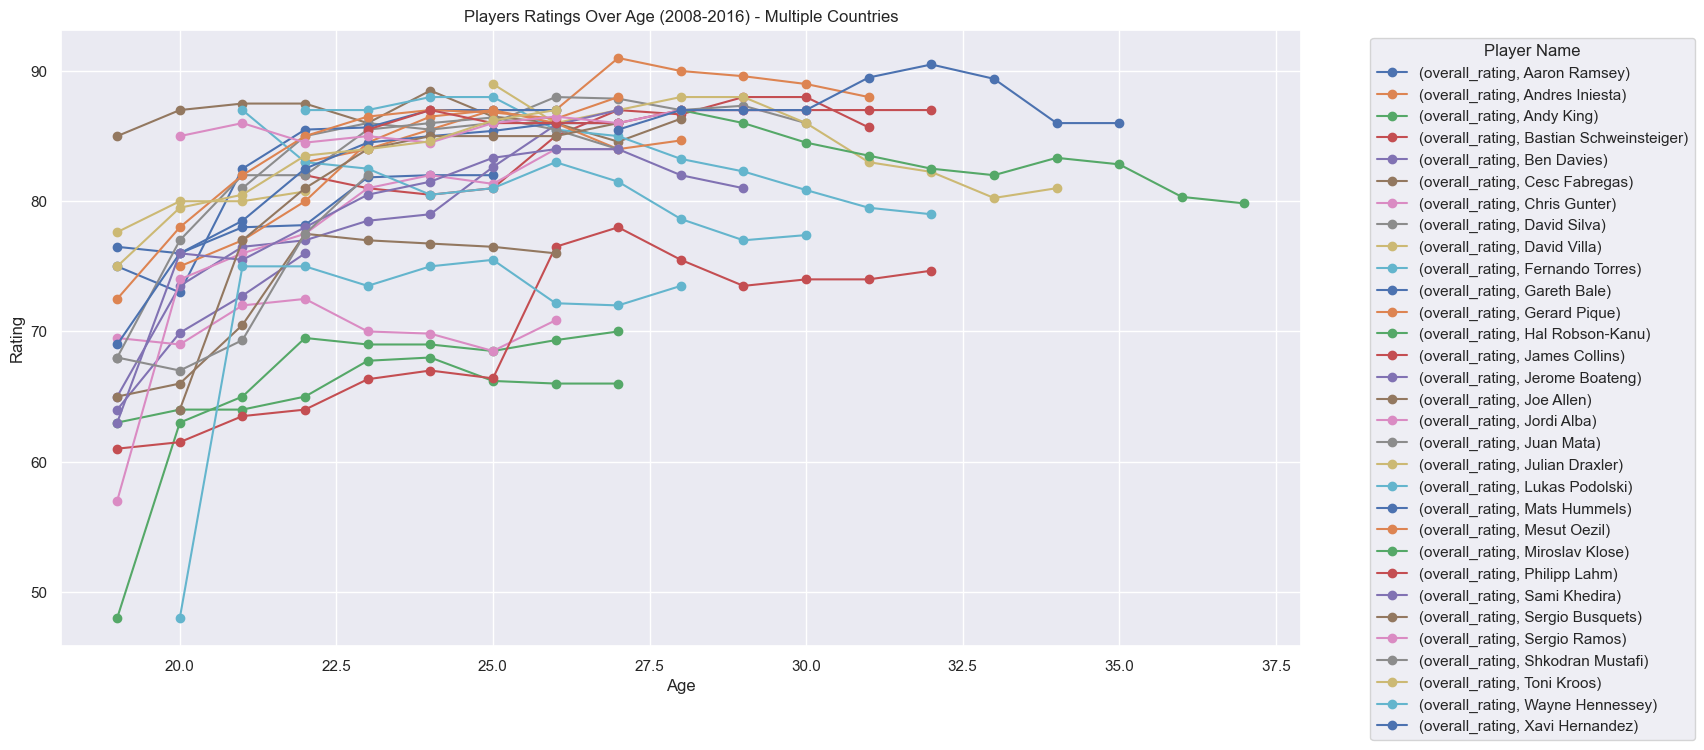

In [30]:
# Plot the ratings of players from multiple countries over the age range 2008-2016
ax = selected_players_rating.plot(figsize=(16, 8), marker='o')
plt.title("Players Ratings Over Age (2008-2016) - Multiple Countries")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [62]:
# Concatenating DataFrames
countries_player = pd.concat([wales,germany,spain],axis=0)
# Selecting columns
countries_player = countries_player[['player_name','overall_rating', 'potential','crossing', 'finishing','heading_accuracy',
                                    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                                    'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                                    'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                                    'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                                    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','height', 'weight']]
# Resetting index and setting player name as the new index
countries_player = countries_player.reset_index(drop=True)
countries_player = countries_player.set_index('overall_rating')
countries_player = countries_player.drop(columns=['player_name'])
countries_player.shape

# Assuming 'countries_player_sorted' is the DataFrame with players sorted by 'overall_rating'
average_stats_by_rating = countries_player_sorted.groupby('overall_rating').mean()

# Sort the DataFrame by the 'overall_rating' column in descending order
average_stats_by_rating = countries_player.sort_values(by='overall_rating', ascending=False)

average_stats_by_rating.head(50)

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,height,weight
overall_rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
92.0,92.0,85.0,70.0,51.0,97.0,69.0,83.0,85.0,87.0,93.0,95.0,68.0,66.0,82.0,93.0,90.0,65.0,53.0,82.0,61.0,75.0,53.0,74.0,94.0,97.0,75.0,55.0,62.0,61.0,170.18,148
91.0,93.0,85.0,73.0,54.0,95.0,74.0,90.0,80.0,65.0,89.0,94.0,76.0,74.0,83.0,90.0,86.0,65.0,54.0,78.0,59.0,75.0,58.0,68.0,89.0,93.0,65.0,57.0,57.0,56.0,170.18,150
89.0,93.0,82.0,93.0,76.0,89.0,87.0,83.0,82.0,89.0,78.0,85.0,88.0,86.0,85.0,89.0,82.0,88.0,71.0,90.0,85.0,87.0,77.0,87.0,86.0,86.0,79.0,42.0,48.0,38.0,175.26,152
89.0,92.0,83.0,80.0,67.0,92.0,81.0,83.0,77.0,83.0,92.0,91.0,72.0,69.0,68.0,88.0,78.0,78.0,69.0,80.0,65.0,84.0,45.0,63.0,89.0,93.0,86.0,62.0,70.0,65.0,175.26,163
88.0,89.0,80.0,75.0,54.0,89.0,77.0,86.0,84.0,79.0,84.0,90.0,77.0,68.0,84.0,87.0,70.0,70.0,52.0,64.0,56.0,76.0,54.0,24.0,84.0,93.0,76.0,22.0,16.0,19.0,182.88,168
88.0,91.0,50.0,58.0,85.0,85.0,57.0,64.0,43.0,43.0,84.0,76.0,63.0,63.0,57.0,84.0,44.0,53.0,74.0,71.0,85.0,42.0,69.0,89.0,50.0,77.0,69.0,89.0,93.0,89.0,193.04,187
88.0,91.0,73.0,95.0,81.0,83.0,90.0,86.0,79.0,68.0,51.0,87.0,93.0,89.0,85.0,95.0,78.0,86.0,82.0,85.0,77.0,78.0,72.0,78.0,95.0,81.0,93.0,21.0,20.0,29.0,185.42,172
88.0,88.0,85.0,72.0,54.0,92.0,80.0,87.0,83.0,77.0,85.0,91.0,79.0,68.0,93.0,84.0,88.0,71.0,66.0,68.0,56.0,79.0,51.0,41.0,83.0,93.0,77.0,23.0,30.0,29.0,170.18,148
88.0,88.0,81.0,76.0,79.0,88.0,83.0,81.0,82.0,78.0,87.0,86.0,58.0,64.0,74.0,91.0,75.0,86.0,82.0,86.0,78.0,83.0,80.0,86.0,82.0,86.0,81.0,69.0,80.0,77.0,182.88,174


In [1]:
# Specify the path where you want to save the CSV file
csv_path = '/your/azure/synapse/path/soccerdata.csv'

# Write the DataFrame to a CSV file
average_stats_by_rating.to_csv(csv_path, index=True, header=True)

NameError: name 'average_stats_by_rating' is not defined

In [28]:
# Specify the path where you want to save the CSV file
csv_path = r'C:\Users\youruser\your\path\here\soccerdata.csv'

# Write the DataFrame to a CSV file
spark_df = spark.read.csv(csv_path, header=True, inferSchema=True)
# Display the first few rows of the spark DataFrame
spark_df.show()

NameError: name 'spark' is not defined